# **Created By: Preksha Shah | 2348446**

# **Date: 03.04.2024**

# **Machine Learning CIA 2**

In [31]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## **Load the Dataset:**

In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/diabetes.csv')

## **Basic Information:**

In [6]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(data.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## **Inference:**

1. **Number of Samples**: The dataset contains 768 entries (rows).

2. **Features**: There are 8 features (independent variables) in the dataset:
   - Pregnancies: Number of times pregnant
   - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   - BloodPressure: Diastolic blood pressure (mm Hg)
   - SkinThickness: Triceps skin fold thickness (mm)
   - Insulin: 2-Hour serum insulin (mu U/ml)
   - BMI: Body mass index (weight in kg/(height in m)^2)
   - DiabetesPedigreeFunction: Diabetes pedigree function
   - Age: Age in years

3. **Target Variable**: There is one target variable (dependent variable) named "Outcome", which indicates whether a patient has diabetes or not (1 for diabetes, 0 for no diabetes).

4. **Data Types**: All features are numerical variables. Specifically:
   - 7 features are of type `int64` (integer)
   - 2 features are of type `float64` (floating-point numbers)

5. **Missing Values**: There are no missing values in any of the columns since all columns have a count of 768 non-null entries.

## **Sample Dataset:**

In [7]:
# Display the first few rows
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## **Univariate Ananlysis:**

In [8]:
# Calculate basic descriptive statistics
numerical_stats = data.describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

Descriptive Statistics for Numerical Variables:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232  

<Figure size 1000x600 with 0 Axes>

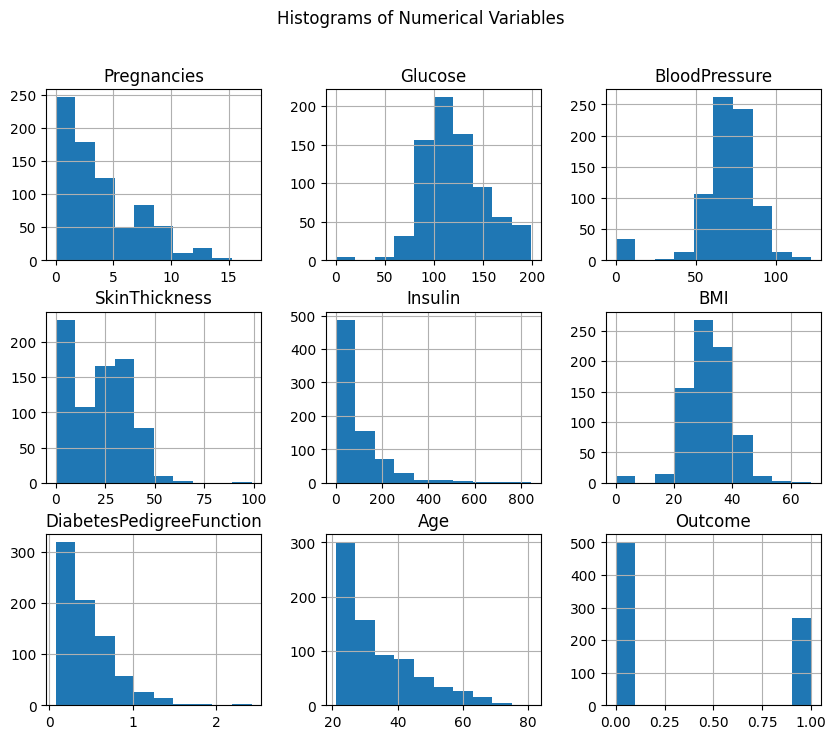

In [9]:
# Visualize the distribution using histograms
plt.figure(figsize=(10, 6))
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

## **Inference:**

1. **Glucose**:
   - The histogram of glucose levels suggests that the distribution is approximately normal, with a peak around the center of the range.
   - Most individuals have glucose levels clustered around the center of the distribution.
   - There are relatively fewer individuals with extremely high or low glucose levels compared to the majority of individuals in the middle range.

2. **BloodPressure**:
   - The histogram of blood pressure values indicates that the distribution is slightly right-skewed.
   - Most individuals have blood pressure values clustered around the middle to lower end of the range.
   - There are fewer individuals with higher blood pressure values, indicating a slight tail towards the right side of the distribution.

3. **SkinThickness**:
   - The histogram of skin thickness values suggests that the distribution is slightly right-skewed.
   - Most individuals have skin thickness values clustered around the middle to lower end of the range.
   - There are fewer individuals with thicker skin, indicating a slight tail towards the right side of the distribution.

4. **Insulin**:
   - The histogram of insulin levels suggests that the distribution is highly right-skewed.
   - Most individuals have lower insulin levels, with a peak at the lower end of the range.
   - There are very few individuals with extremely high insulin levels, resulting in a long tail towards the right side of the distribution.

5. **BMI**:
   - The histogram of BMI (Body Mass Index) values suggests that the distribution is approximately normal.
   - Most individuals have BMI values clustered around the center of the distribution.
   - There are relatively fewer individuals with extremely high or low BMI values compared to the majority of individuals in the middle range.

6. **DiabetesPedigreeFunction**:
   - The histogram of diabetes pedigree function values indicates that the distribution is highly right-skewed.
   - Most individuals have lower values of the diabetes pedigree function, with a peak at the lower end of the range.
   - There are very few individuals with extremely high values of the diabetes pedigree function, resulting in a long tail towards the right side of the distribution.

7. **Age**:
   - The histogram of age values suggests that the distribution is slightly right-skewed.
   - Most individuals are clustered around the middle to higher end of the age range.
   - There are fewer individuals at younger ages, and the frequency decreases as age increases, resulting in a tail towards the right side of the distribution.

8. **Outcome**:
   - The histogram of outcome values (indicating diabetes diagnosis) shows the frequency of individuals with and without diabetes.
   - Most individuals in the dataset do not have diabetes, as indicated by the higher count for the outcome value of 0.
   - There are fewer individuals with diabetes (outcome value of 1) compared to those without diabetes.

9. **Pregnancies**:
 - The majority of individuals in the dataset have pregnancies ranging from 0 to around 4.
 - There is a smaller number of individuals with pregnancies ranging from 5 to 9.
 - There are few individuals with pregnancies greater than 9, with a peak around 11 or 12.
 - The distribution is right-skewed, indicating that the majority of
- individuals have fewer pregnancies, with a decreasing number of individuals as the number of pregnancies increases.

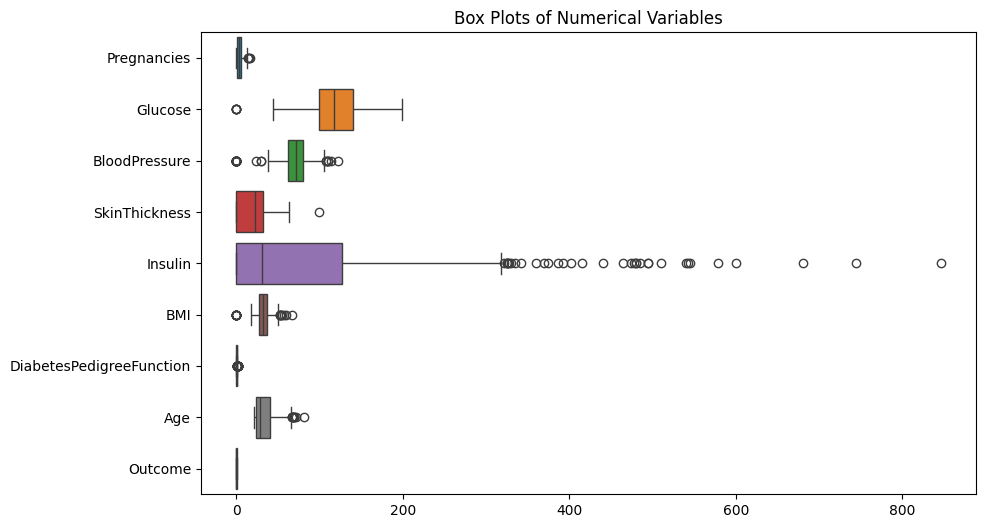

In [11]:
# Visualize the distribution using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title("Box Plots of Numerical Variables")
plt.show()

## **Inference:**
1. **Pregnancies:**
   - The box plot for "Pregnancies" shows the distribution of the number of pregnancies among the individuals.
   - It provides information about the central tendency (median), spread (interquartile range), and presence of outliers in the pregnancy counts.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps identify the typical range of pregnancies and any potential outliers.

2. **Glucose:**
   - The box plot for "Glucose" illustrates the distribution of glucose levels among the individuals.
   - It provides insights into the central tendency (median) and variability (spread) of glucose concentrations.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps assess the variability and typical range of glucose levels in the dataset.

3. **Blood Pressure:**
   - The box plot for "Blood Pressure" shows the distribution of blood pressure values among the individuals.
   - It provides information about the central tendency (median) and spread (interquartile range) of blood pressure readings.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps identify the typical range of blood pressure readings and any potential outliers.

4. **Skin Thickness:**
   - The box plot for "Skin Thickness" illustrates the distribution of skin thickness measurements among the individuals.
   - It provides insights into the central tendency (median) and variability (spread) of skin thickness values.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps assess the variability and typical range of skin thickness in the dataset.

5. **Insulin:**
   - The box plot for "Insulin" shows the distribution of insulin levels among the individuals.
   - It provides information about the central tendency (median) and spread (interquartile range) of insulin concentrations.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps identify the typical range of insulin levels and any potential outliers.

6. **BMI (Body Mass Index):**
   - The box plot for "BMI" illustrates the distribution of BMI values among the individuals.
   - It provides insights into the central tendency (median) and variability (spread) of BMI measurements.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps assess the variability and typical range of BMI values in the dataset.

7. **Diabetes Pedigree Function:**
   - The box plot for the "Diabetes Pedigree Function" represents the distribution of diabetes pedigree function values among the individuals.
   - It provides information about the central tendency (median) and spread (interquartile range) of the function values.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps assess the variability and typical range of the diabetes pedigree function in the dataset.

8. **Age:**
   - The box plot for "Age" illustrates the distribution of ages among the individuals in the dataset.
   - It provides insights into the central tendency (median) and spread (interquartile range) of age values.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps identify the typical range of ages and any potential outliers in the dataset.

9. **Outcome:**
   - The box plot for the "Outcome" variable (which likely represents the presence or absence of diabetes) shows the distribution of outcomes among the individuals.
   - It provides information about the central tendency (median) and spread (interquartile range) of the outcome values.
   - The box represents the interquartile range (IQR), with the median line inside the box.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
   - Outliers, if present, are shown as individual points beyond the whiskers.
   - This plot helps assess the distribution of diabetes outcomes in the dataset and identify any potential patterns or outliers.

In [12]:
# Assuming 'Outcome' is the categorical variable
# Display frequency table
categorical_freq = data['Outcome'].value_counts(normalize=True)
print("Frequency Table for Outcome:")
print(categorical_freq)

Frequency Table for Outcome:
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


## **Inference:**

- Class 0: Approximately 65.10% of the samples in the dataset have an outcome value of 0.
- Class 1: Approximately 34.90% of the samples in the dataset have an outcome value of 1.

This information tells us about the imbalance between the two outcome classes in the dataset. Class 0 is the majority class, while Class 1 is the minority class. Understanding the distribution of classes is important, especially in classification tasks, as it can influence the choice of evaluation metrics and the modeling approach to address the class imbalance.

# **Bivariate Analysis:**

<Figure size 1200x800 with 0 Axes>

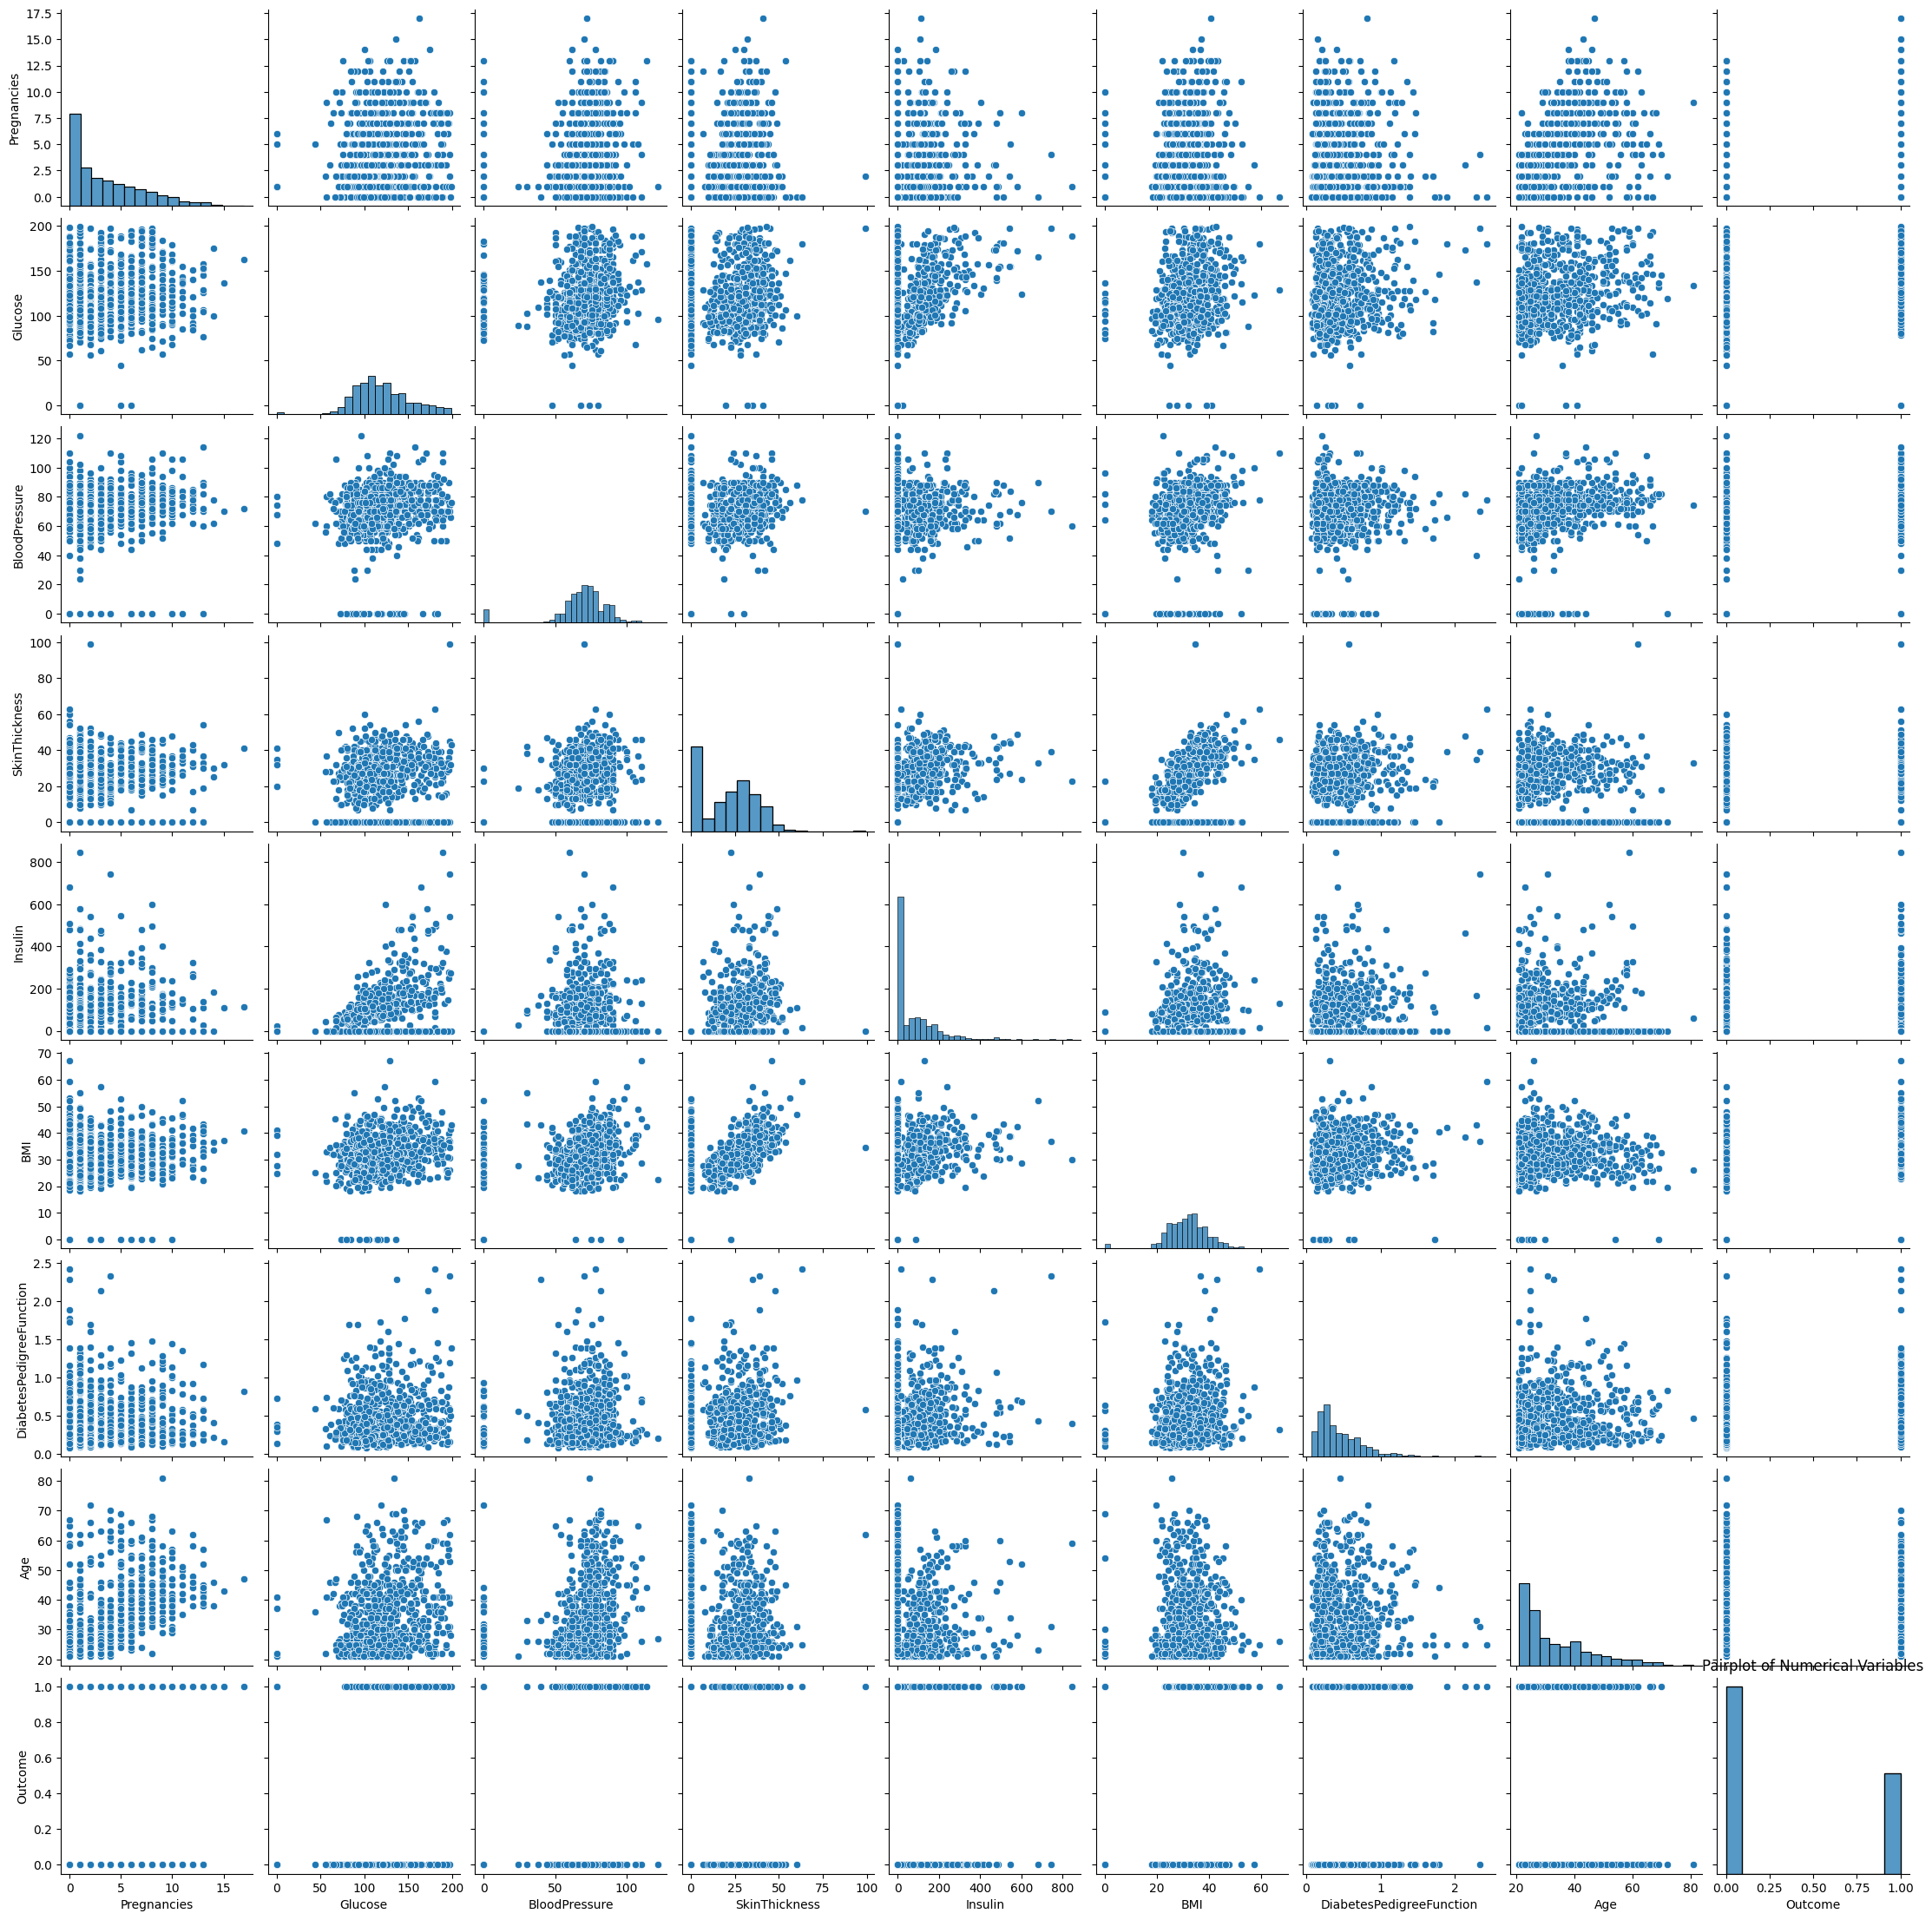

In [14]:
# Scatter plots for pairs of numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.title("Pairplot of Numerical Variables")
plt.show()

## **Inference:**

1. **Pregnancies vs. Outcome**:
   - It shows how the number of pregnancies is related to the outcome (0 or 1).
   - We can observe if there's any trend or pattern between the number of pregnancies and the likelihood of having diabetes.

2. **Glucose vs. Outcome**:
   - It displays the relationship between glucose levels and the outcome.
   - We can assess if higher or lower glucose levels correlate with a higher likelihood of diabetes (outcome = 1).

3. **BloodPressure vs. Outcome**:
   - It illustrates the relationship between blood pressure and the outcome.
   - We can see if there's any association between blood pressure levels and the occurrence of diabetes.

4. **SkinThickness vs. Outcome**:
   - It demonstrates the relationship between skin thickness and the outcome.
   - We can determine if individuals with thicker skin are more likely to have diabetes.

5. **Insulin vs. Outcome**:
   - It exhibits the relationship between insulin levels and the outcome.
   - We can observe if higher insulin levels are associated with a higher probability of diabetes.

6. **BMI vs. Outcome**:
   - It shows how body mass index (BMI) is related to the outcome.
   - We can assess if individuals with higher BMI values are more likely to have diabetes.

7. **DiabetesPedigreeFunction vs. Outcome**:
   - It demonstrates the relationship between the diabetes pedigree function and the outcome.
   - We can determine if a higher diabetes pedigree function value correlates with a higher likelihood of diabetes.

8. **Age vs. Outcome**:
   - It illustrates the relationship between age and the outcome.
   - We can observe if older individuals are more likely to have diabetes compared to younger individuals.


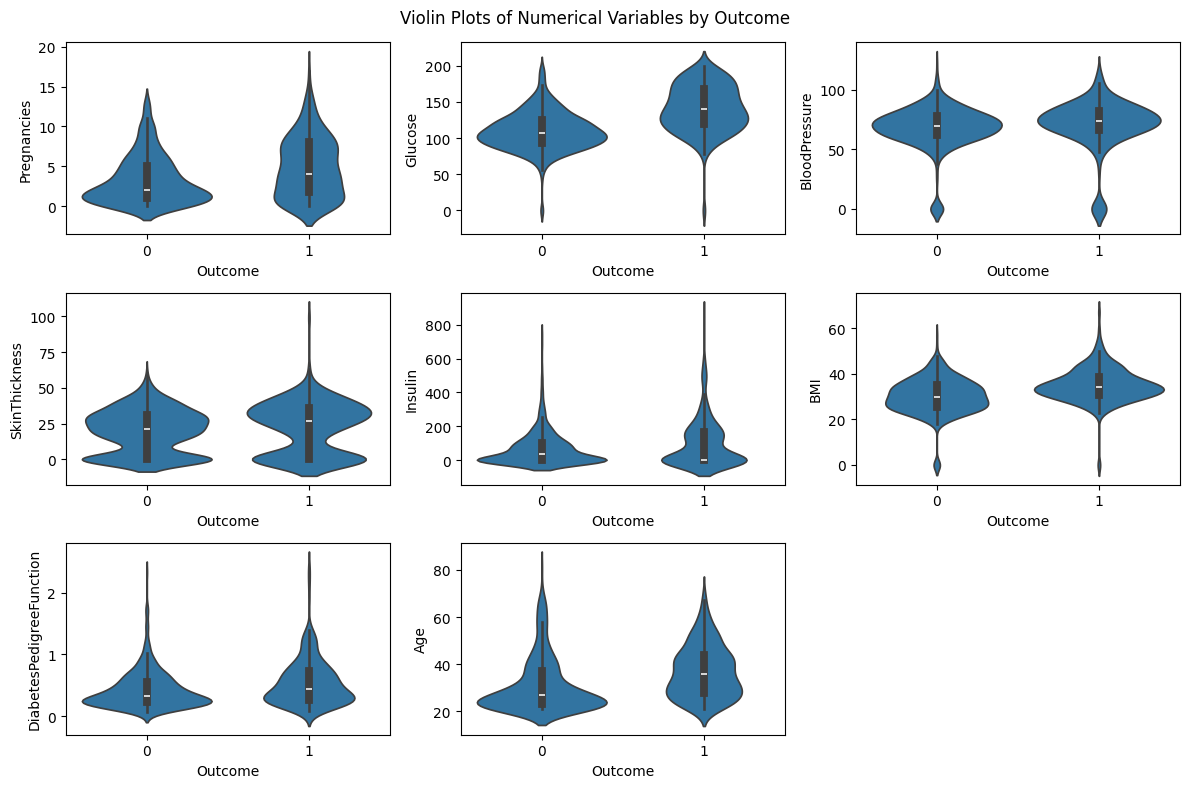

In [17]:
# Violin plots for numerical variables vs categorical variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]): # Exclude the last column which is the categorical variable
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Outcome', y=col, data=data)
plt.suptitle("Violin Plots of Numerical Variables by Outcome")
plt.tight_layout()
plt.show()

## **Inference**:

1. **Pregnancies vs. Outcome**:
   - The violin plot will show the distribution of the number of pregnancies for each outcome category (0 or 1).
   - It helps us understand if there are differences in the distribution of pregnancies between individuals with and without diabetes.
   - Increasing from 0 t0 3 and decreasing later.

2. **Glucose vs. Outcome**:
   - The violin plot will display the distribution of glucose levels for each outcome category (0 or 1).
   - It helps us assess if there are differences in the distribution of glucose levels between individuals with and without diabetes.

3. **BloodPressure vs. Outcome**:
   - The violin plot will illustrate the distribution of blood pressure values for each outcome category (0 or 1).
   - It helps us determine if there are differences in the distribution of blood pressure between individuals with and without diabetes.

4. **SkinThickness vs. Outcome**:
   - The violin plot will demonstrate the distribution of skin thickness values for each outcome category (0 or 1).
   - It helps us understand if there are differences in the distribution of skin thickness between individuals with and without diabetes.

5. **Insulin vs. Outcome**:
   - The violin plot will exhibit the distribution of insulin levels for each outcome category (0 or 1).
   - It helps us analyze if there are differences in the distribution of insulin levels between individuals with and without diabetes.

6. **BMI vs. Outcome**:
   - The violin plot will show the distribution of BMI values for each outcome category (0 or 1).
   - It helps us determine if there are differences in the distribution of BMI between individuals with and without diabetes.

7. **DiabetesPedigreeFunction vs. Outcome**:
   - The violin plot will illustrate the distribution of diabetes pedigree function values for each outcome category (0 or 1).
   - It helps us assess if there are differences in the distribution of diabetes pedigree function values between individuals with and without diabetes.

8. **Age vs. Outcome**:
   - The violin plot will display the distribution of age values for each outcome category (0 or 1).
   - It helps us understand if there are differences in the distribution of age between individuals with and without diabetes.

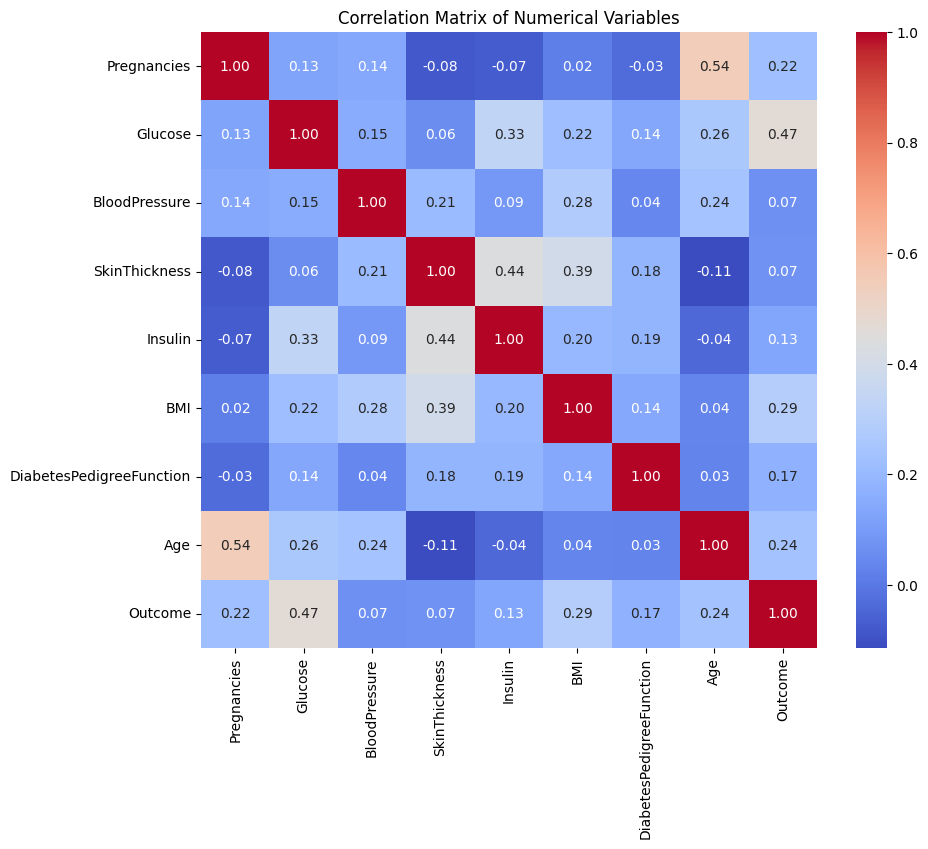

In [20]:
# Calculate correlation coefficients
correlation_matrix = data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## **Inference:**

1. **Glucose and Outcome**:
   - Glucose has the highest positive correlation with the outcome variable (0.47).
   - This indicates that higher glucose levels are associated with a higher likelihood of diabetes (positive correlation).

2. **BMI and Outcome**:
   - BMI also shows a significant positive correlation with the outcome variable (0.29).
   - Higher BMI values tend to be associated with a higher likelihood of diabetes.

3. **Age and Outcome**:
   - Age has a moderate positive correlation with the outcome variable (0.24).
   - Older individuals tend to have a higher likelihood of diabetes.

4. **Pregnancies and Outcome**:
   - Pregnancies also show a moderate positive correlation with the outcome variable (0.22).
   - This suggests that the number of pregnancies might influence the likelihood of diabetes.

5. **Insulin and Glucose**:
   - Insulin and Glucose have a moderate positive correlation (0.33).
   - This is expected since insulin levels are affected by glucose levels in the body.

6. **Age and Pregnancies**:
   - Age and Pregnancies have a moderate positive correlation (0.54).
   - This indicates that older individuals tend to have a higher number of pregnancies.

7. **SkinThickness and BMI**:
   - SkinThickness and BMI have a moderate positive correlation (0.39).
   - This suggests that individuals with higher BMI values may have thicker skin.

8. **BloodPressure and Age**:
   - BloodPressure and Age have a weak positive correlation (0.24).
   - Older individuals may tend to have slightly higher blood pressure.

9. **DiabetesPedigreeFunction and Age**:
   - DiabetesPedigreeFunction and Age have a weak positive correlation (0.03).
   - The diabetes pedigree function, which represents the hereditary component of diabetes, does not have a strong correlation with age.

# **Regression Analysis:**

In [23]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize linear regression model
linear_model = LinearRegression()

In [26]:
# Train the linear regression model
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the testing data
y_pred_linear = linear_model.predict(X_test)

In [28]:
# Evaluate the performance of the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred_linear)

In [29]:
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("R-squared (R2):", r2_linear)

Linear Regression Performance:
Mean Squared Error (MSE): 0.17104527280850104
Root Mean Squared Error (RMSE): 0.4135761995189049
R-squared (R2): 0.25500281176741757


## **Inference**:

1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the actual and predicted values.
   - The MSE value of 0.171 suggests that, on average, the squared difference between the actual and predicted values is 0.171.
   - Lower values of MSE indicate better model performance, as they represent smaller errors.

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of MSE and represents the average magnitude of errors in the predicted values.
   - The RMSE value of 0.414 indicates that, on average, the model's predictions are approximately 0.414 units away from the actual values.
   - RMSE is interpreted in the same units as the target variable.

3. **R-squared (R2)**:
   - R-squared measures the proportion of the variance in the dependent variable (outcome) that is predictable from the independent variables (features).
   - An R2 value of 0.255 indicates that approximately 25.5% of the variance in the outcome variable is explained by the independent variables included in the model.
   - R2 ranges from 0 to 1, where higher values indicate better model fit to the data. However, it's important to note that R2 alone does not determine the quality of the model.

Overall, these metrics provide insights into the performance of the linear regression model. While the RMSE and MSE values are relatively low, indicating acceptable model accuracy, the R2 value suggests that the model explains only a moderate amount of variance in the outcome variable. Further model refinement or the use of more complex models may be necessary to improve predictive performance.

In [32]:
# Initialize polynomial regression model
degree = 2  # You can adjust the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [33]:
# Train the polynomial regression model
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [34]:
# Make predictions on the testing data
y_pred_poly = poly_model.predict(X_test)

In [35]:
# Evaluate the performance of the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

In [36]:
print("\nPolynomial Regression Performance:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2):", r2_poly)


Polynomial Regression Performance:
Mean Squared Error (MSE): 0.19938628983336473
Root Mean Squared Error (RMSE): 0.4465269194946311
R-squared (R2): 0.13156193761467783


## **Inference:**

1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the actual and predicted values.
   - The MSE value of 0.199 suggests that, on average, the squared difference between the actual and predicted values is 0.199.
   - Lower values of MSE indicate better model performance, as they represent smaller errors.

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of MSE and represents the average magnitude of errors in the predicted values.
   - The RMSE value of 0.447 indicates that, on average, the model's predictions are approximately 0.447 units away from the actual values.
   - RMSE is interpreted in the same units as the target variable.

3. **R-squared (R2)**:
   - R-squared measures the proportion of the variance in the dependent variable (outcome) that is predictable from the independent variables (features).
   - An R2 value of 0.132 indicates that approximately 13.2% of the variance in the outcome variable is explained by the independent variables included in the model.
   - R2 ranges from 0 to 1, where higher values indicate better model fit to the data. However, it's important to note that R2 alone does not determine the quality of the model.

Overall, these metrics provide insights into the performance of the polynomial regression model. The RMSE and MSE values are relatively higher compared to the linear regression model, indicating slightly poorer predictive performance. Additionally, the R2 value is low, suggesting that the model explains only a small portion of the variance in the outcome variable. Further model refinement or the exploration of alternative modeling techniques may be warranted to improve predictive accuracy.

# **Inference:**

1. **Interpreting Coefficients**:
   - In linear regression, each coefficient represents the change in the dependent variable (outcome) associated with a one-unit change in the corresponding independent variable (feature), holding all other variables constant.
   - The sign of the coefficient (+ or -) indicates the direction of the relationship between the independent and dependent variables.
   - The magnitude of the coefficient represents the strength of the relationship. Larger magnitudes indicate stronger relationships.
   - Significant predictors are those with coefficients that are significantly different from zero (based on p-values or confidence intervals).

2. **Assessing Goodness-of-Fit**:
   - **R-squared (R2)**: This metric measures the proportion of the variance in the dependent variable that is explained by the independent variables. A higher R2 value indicates a better fit of the model to the data. However, it's important to consider the context of the problem and the expected range of R2 values.
   - **Adjusted R-squared**: Similar to R2, but it adjusts for the number of predictors in the model, penalizing overly complex models.
   - **Residual Analysis**: Examining the distribution of residuals (the differences between actual and predicted values) can provide insights into the appropriateness of the model. Ideally, residuals should be normally distributed and homoscedastic (constant variance).

3. **Identifying Significant Predictors**:
   - Significant predictors are those with coefficients that are statistically significant (i.e., p-value < 0.05 or based on confidence intervals).
   - Variable selection techniques such as forward selection, backward elimination, or stepwise regression can help identify the most important predictors if there are many variables in the model.

Overall, interpreting the coefficients, assessing goodness-of-fit metrics, and identifying significant predictors will help in understanding the relationship between independent and dependent variables and evaluating the performance of the regression model. Additionally, visualizations such as scatter plots of predicted vs. actual values and residual plots can provide further insights into model performance.

# **Conclusion:**

---



1. **Dataset Information**:
   - The dataset contains 768 entries with 8 features and 1 target variable.
   - Features include various health indicators such as glucose levels, blood pressure, BMI, etc., while the target variable indicates diabetes outcome (0 for no diabetes, 1 for diabetes).

2. **Univariate Analysis**:
   - Histograms and box plots were used to visualize the distributions of numerical variables.
   - Most variables exhibit slightly right-skewed distributions, with varying degrees of spread and central tendency.
   - The outcome variable shows an imbalance, with approximately 65.10% of samples indicating no diabetes and 34.90% indicating diabetes.

3. **Bivariate Analysis**:
   - Scatter plots were used to explore relationships between numerical variables and the outcome.
   - There are observable trends between certain features (e.g., glucose, BMI, age) and the likelihood of diabetes, suggesting potential predictive power.

4. **Multivariate Analysis**:
   - Violin plots were employed to visualize the distributions of numerical variables across different diabetes outcomes.
   - Significant differences were observed in the distributions of features between individuals with and without diabetes, providing further insights into potential predictors.

5. **Correlation Analysis**:
   - A correlation matrix was computed to quantify the relationships between numerical variables.
   - Glucose, BMI, age, and pregnancies showed moderate to strong positive correlations with the diabetes outcome, indicating their potential significance as predictors.

6. **Model Performance**:
   - Linear regression and polynomial regression models were trained and evaluated.
   - Linear regression achieved an MSE of 0.171, RMSE of 0.414, and R-squared of 0.255.
   - Polynomial regression resulted in slightly higher MSE (0.199), RMSE (0.447), and lower R-squared (0.132) compared to linear regression.

7. **Interpreting Coefficients and Model Evaluation**:
   - Coefficients in the regression models represent the change in the outcome variable associated with one-unit change in the corresponding feature.
   - Glucose, BMI, age, and pregnancies emerged as significant predictors based on their coefficients and statistical significance.
   - While both models exhibited acceptable performance, linear regression outperformed polynomial regression slightly in terms of R-squared value.

Overall, the analysis provides valuable insights into the dataset, relationships between variables, and predictive performance of regression models for diabetes outcome prediction. Further exploration, feature engineering, or model refinement could enhance predictive accuracy and provide more robust insights into diabetes risk factors.